Problem 1

In [157]:
import numpy as np
A = [[7,1,5,6],[2,6,1,1],[6,1,7,2],[6,6,3,1],[5,5,6,1],[3,6,7,1]]
A = np.array(A)
def common_mat_ele(A,rows = True):
    common = set()
    if rows:
        for element in A[0]:
            common.add(element)
        for row in A:
            check = set()
            for col in row:
                check.add(col)
            common.intersection_update(check)
    if rows == False:
        for row in A:
            common.add(row[0])
        for col in range(len(A[0])):
            check = set()
            for row in range(len(A)):
                check.add(A[row][col])
            common.intersection_update(check)
    return list(common)

print(common_mat_ele(A,rows=True))





[1, 6]


Problem 2

In [154]:
class point:
    def __init__(self, x_cord,y_cord,z_cord = 0):
        self.x_cord = x_cord
        self.y_cord = y_cord
        self.z_cord = z_cord
        self._r = ((x_cord)**2 + (y_cord)**2 + (z_cord)**2)**0.5

    @property
    def r(self):
        return self._r
    
    def __str__(self):
        return f'{(self.x_cord,self.y_cord,self.z_cord)}'
    def __sub__(self,other):
        if isinstance(other,point):
            return point(self.x_cord-other.x_cord,self.y_cord-other.y_cord,self.z_cord-other.z_cord)
    def __isub__(self,other):
        if isinstance(other,point):
            return point(self.x_cord-other.x_cord,self.y_cord-other.y_cord,self.z_cord-other.z_cord)
    def __mul__(self,other):
        if isinstance(other,int) or isinstance(other,float):
            return point(self.x_cord * other,self.y_cord * other,self.z_cord * other)
    def __imul__(self,other):
        if isinstance(other,int) or isinstance(other,float):
            return point(self.x_cord * other,self.y_cord * other,self.z_cord * other)
    def asdict(self):
        dic = {'x':self.x_cord,'y':self.y_cord,'z':self.z_cord}
        return dic
    def __lt__(self,other):
        if isinstance(other,point):
            return self.r < other.r
    def __eq__(self,other):
        if isinstance(other,point):
            return self.r == other.r
    def __le__(self,other):
            if self < other or self == other:
                return True
            else:
                return False
    def __gt__(self, other):
        if self < other:
            return False
        else:
            return True
    def __ge__(self,other):
        if self <= other:
            return False
        else:
            return True

p1 = point(1,2)
p2 = point(3,4)
try:
    p1.r = 5
except:
    print('Error')
# did not assign new value
print(p1.r)
# String method
print(p1)
# comparsion operators 
print(f'P1 > P2: {p1 > p2}')
print(f'P1 < P2: {p1 < p2}')
print(f'P1 <= P2: {p1 <= p2}')
print(f'P1 >= P2: {p1 >= p2}')
print(f'P1 == P2: {p1 == p2}')
print(f'Subtraction: {p1-p2}')
print(f'Multiplication: {p1*4}')
print(p1.asdict())


Error
2.23606797749979
(1, 2, 0)
P1 > P2: False
P1 < P2: True
P1 <= P2: True
P1 >= P2: False
P1 == P2: False
Subtraction: (-2, -2, 0)
Miltiplication: (4, 8, 0)
{'x': 1, 'y': 2, 'z': 0}


Problem 3

5
4
Error from negative assignment


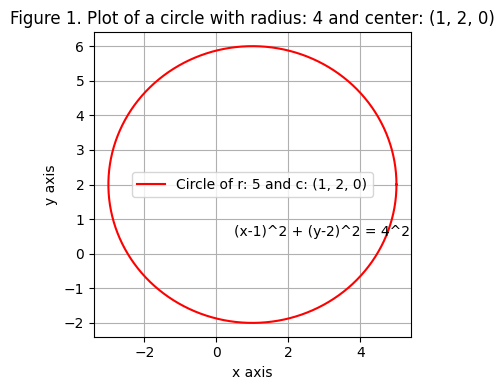

In [156]:
class circle:
    def __init__(self,points,radius):
        self.point = self.pointy(points)
        self._radius = radius

    def pointy(self,points):
        if isinstance(points,point):
            self.point = points
            return points
        else:
            raise ValueError
    @property
    def radius(self):
        return self._radius
    
    @radius.setter
    def radius(self,other):
        if other > 0:
            self._radius = other
        else:
            raise ValueError
    
    def draw(self):
        import matplotlib.pyplot as plt
        import numpy as np
        theta = np.linspace(0,2 * np.pi,150)
        a = self.radius * np.cos(theta) + self.point.x_cord
        b = self.radius * np.sin(theta) + self.point.y_cord
        plt.figure(figsize=(4,4))
        plt.plot(a,b,'r')
        plt.grid()
        plt.title(f"Figure 1. Plot of a circle with radius: {self.radius} and center: {self.point}")
        plt.xlabel('x axis')
        plt.ylabel('y axis')
        plt.legend([f'Circle of r: {5} and c: {self.point}'])
        plt.text(0.5,0.5,s=f'(x-{self.point.x_cord})^2 + (y-{self.point.y_cord})^2 = {self.radius}^2')
        plt.tight_layout()


c1 = circle(point(1,2),5)
print(c1.radius)
c1.radius = 4
print(c1.radius)
try:
    c1.radius = -4
except:
    print("Error from negative assignment")
c1.draw()

        

Problem 4

In [114]:
import random
class Sphere:
    def __init__(self,points,radius):
        self.points = self.point(points)
        self._radius = radius

    def point(self,other):
         if isinstance(other,point):
             self.points = other
             return other 
         else: 
             raise ValueError
    def __str__(self):
        return f'The volume of the sphere centered at {self.points} with radius {self.radius} is equal to {self.vol} units cubed'
    @property
    def radius(self):
        return self._radius 
    @radius.setter
    def radius(self,other):
        if other > 0:
            self._radius = other
        else:
            raise ValueError
    
    @property
    def vol(self):
        return f'{(4/3) * self.radius ** 3 * 3.1415926:5.2f}'

        
    
class CenteredSphere(Sphere):
    def __init__(self,radius):
        self.points = self.point(point(0,0,0))
        self._radius = radius 
    def __str__(self):
        return f'The volume of a sphere centered at the origin with radius {self.radius} is equal to {self.vol}'
    

listy_sphere = [Sphere(point(random.randint(0,5),random.randint(0,5),random.randint(0,5)),random.randint(1,5)) for _ in range(4)]
listy_centered_sphere = [CenteredSphere(random.randint(5,10)) for _ in range(2)]
listy_sphere += listy_centered_sphere

count = 1
for spheres in listy_sphere:
    print(f"Sphere {count}",end=": ")
    print(spheres,end='. \n')
    count+=1

Sphere 1: The volume of the sphere centered at (1, 4, 2) with radius 4 is equal to 268.08 units cubed. 
Sphere 2: The volume of the sphere centered at (2, 0, 1) with radius 4 is equal to 268.08 units cubed. 
Sphere 3: The volume of the sphere centered at (5, 3, 3) with radius 3 is equal to 113.10 units cubed. 
Sphere 4: The volume of the sphere centered at (3, 1, 3) with radius 5 is equal to 523.60 units cubed. 
Sphere 5: The volume of a sphere centered at the origin with rdaius 7 is equal to 1436.76. 
Sphere 6: The volume of a sphere centered at the origin with rdaius 8 is equal to 2144.66. 
